# ※ 프로젝트 목표
 
 과제명 : 딥러닝 모델을 이용한 해충 객체 탐지

- 과제 내용 : 주어진 해충 데이터셋을 이용하여 해충 객체를 탐지하는 딥러닝 모델 기반 프로그램 개발

- 데이터셋 구성 : coco 형식 해충 데이터셋 (데이터 수: 210)

train data : 147, validation data : 43, test data : 20

- 기타

* AI Hub의 해충 데이터 활용 가능

* 해충 객체를 탐지 평가 mAP

* 적용 모델의 특장점, 모델 선택 이유 설명

* 프로젝트 결과 보고서 (프로그램 구성, 학습 과정, 평가 결과, 평가 결과 분석 등 내용 포함)

** 참조 : 테스트 데이터 결과

# 1. 라이브러리 추가

In [1]:
import cv2
from ultralytics import YOLO
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist
from collections import OrderedDict
import numpy as np

# 2. 모델 로드

In [2]:
model = YOLO("yolov8n.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 33.2MB/s]


# 3. 모델 로드 확인


image 1/1 C:\Users\USER\Documents\GitHub\BugFinderAI\test.png: 448x640 2 persons, 124.0ms
Speed: 3.0ms preprocess, 124.0ms inference, 762.9ms postprocess per image at shape (1, 3, 448, 640)


(-0.5, 726.5, 484.5, -0.5)

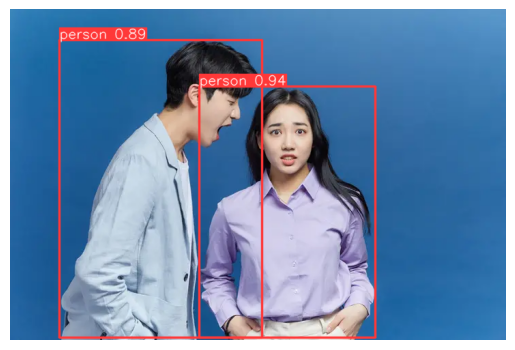

In [3]:
#사람의 객체 번호는 0이므로, 사람만 검출하도록 옵션을 지정함
results = model('test.png', classes=0)
annotated_frame = results[0].plot()[:,:,::-1]
plt.imshow(annotated_frame)
plt.axis('off')

# 4. 학습 준비(train 이미지 데이터 및 어노테이션 출력)

In [ ]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# JSON 파일 경로
json_file_path = 'dataset/train/_annotations.coco.json'

# 이미지 파일이 있는 디렉토리
image_dir = 'dataset/train/images'

# JSON 파일 로드
with open(json_file_path, 'r') as f:
    data = json.load(f)

# 이미지 정보 추출
images = data['images']

# 어노테이션 정보 추출
annotations = data['annotations']

# 시각화할 이미지 수 설정
num_images_to_visualize = 1

# 시각화할 이미지 수만큼 반복
for i in range(num_images_to_visualize):
    annotation = annotations[i]
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    bbox = annotation['bbox']

    # 해당하는 이미지 정보 찾기
    image_info = next((image for image in images if image['id'] == image_id), None)
    if image_info:
        # 이미지 파일 이름
        file_name = image_info['file_name']
        # 이미지 파일 경로
        image_path = os.path.join(image_dir, file_name)
        # 이미지 열기
        image = plt.imread(image_path)
        
        # 이미지 시각화
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        
        # 바운딩 박스 시각화
        x, y, width, height = bbox
        plt.gca().add_patch(Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none'))
        
        # 라벨 표시
        plt.text(x, y-10, f'Label: {category_id}', color='red')
        
        plt.axis('off')
        plt.show()
    else:
        print(f"해당하는 이미지 정보를 찾을 수 없습니다. (이미지 ID: {image_id})")


# 

In [2]:
import torch

# 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp11/weights/best.pt')

Using cache found in C:\Users\USER/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-28 Python-3.8.19 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


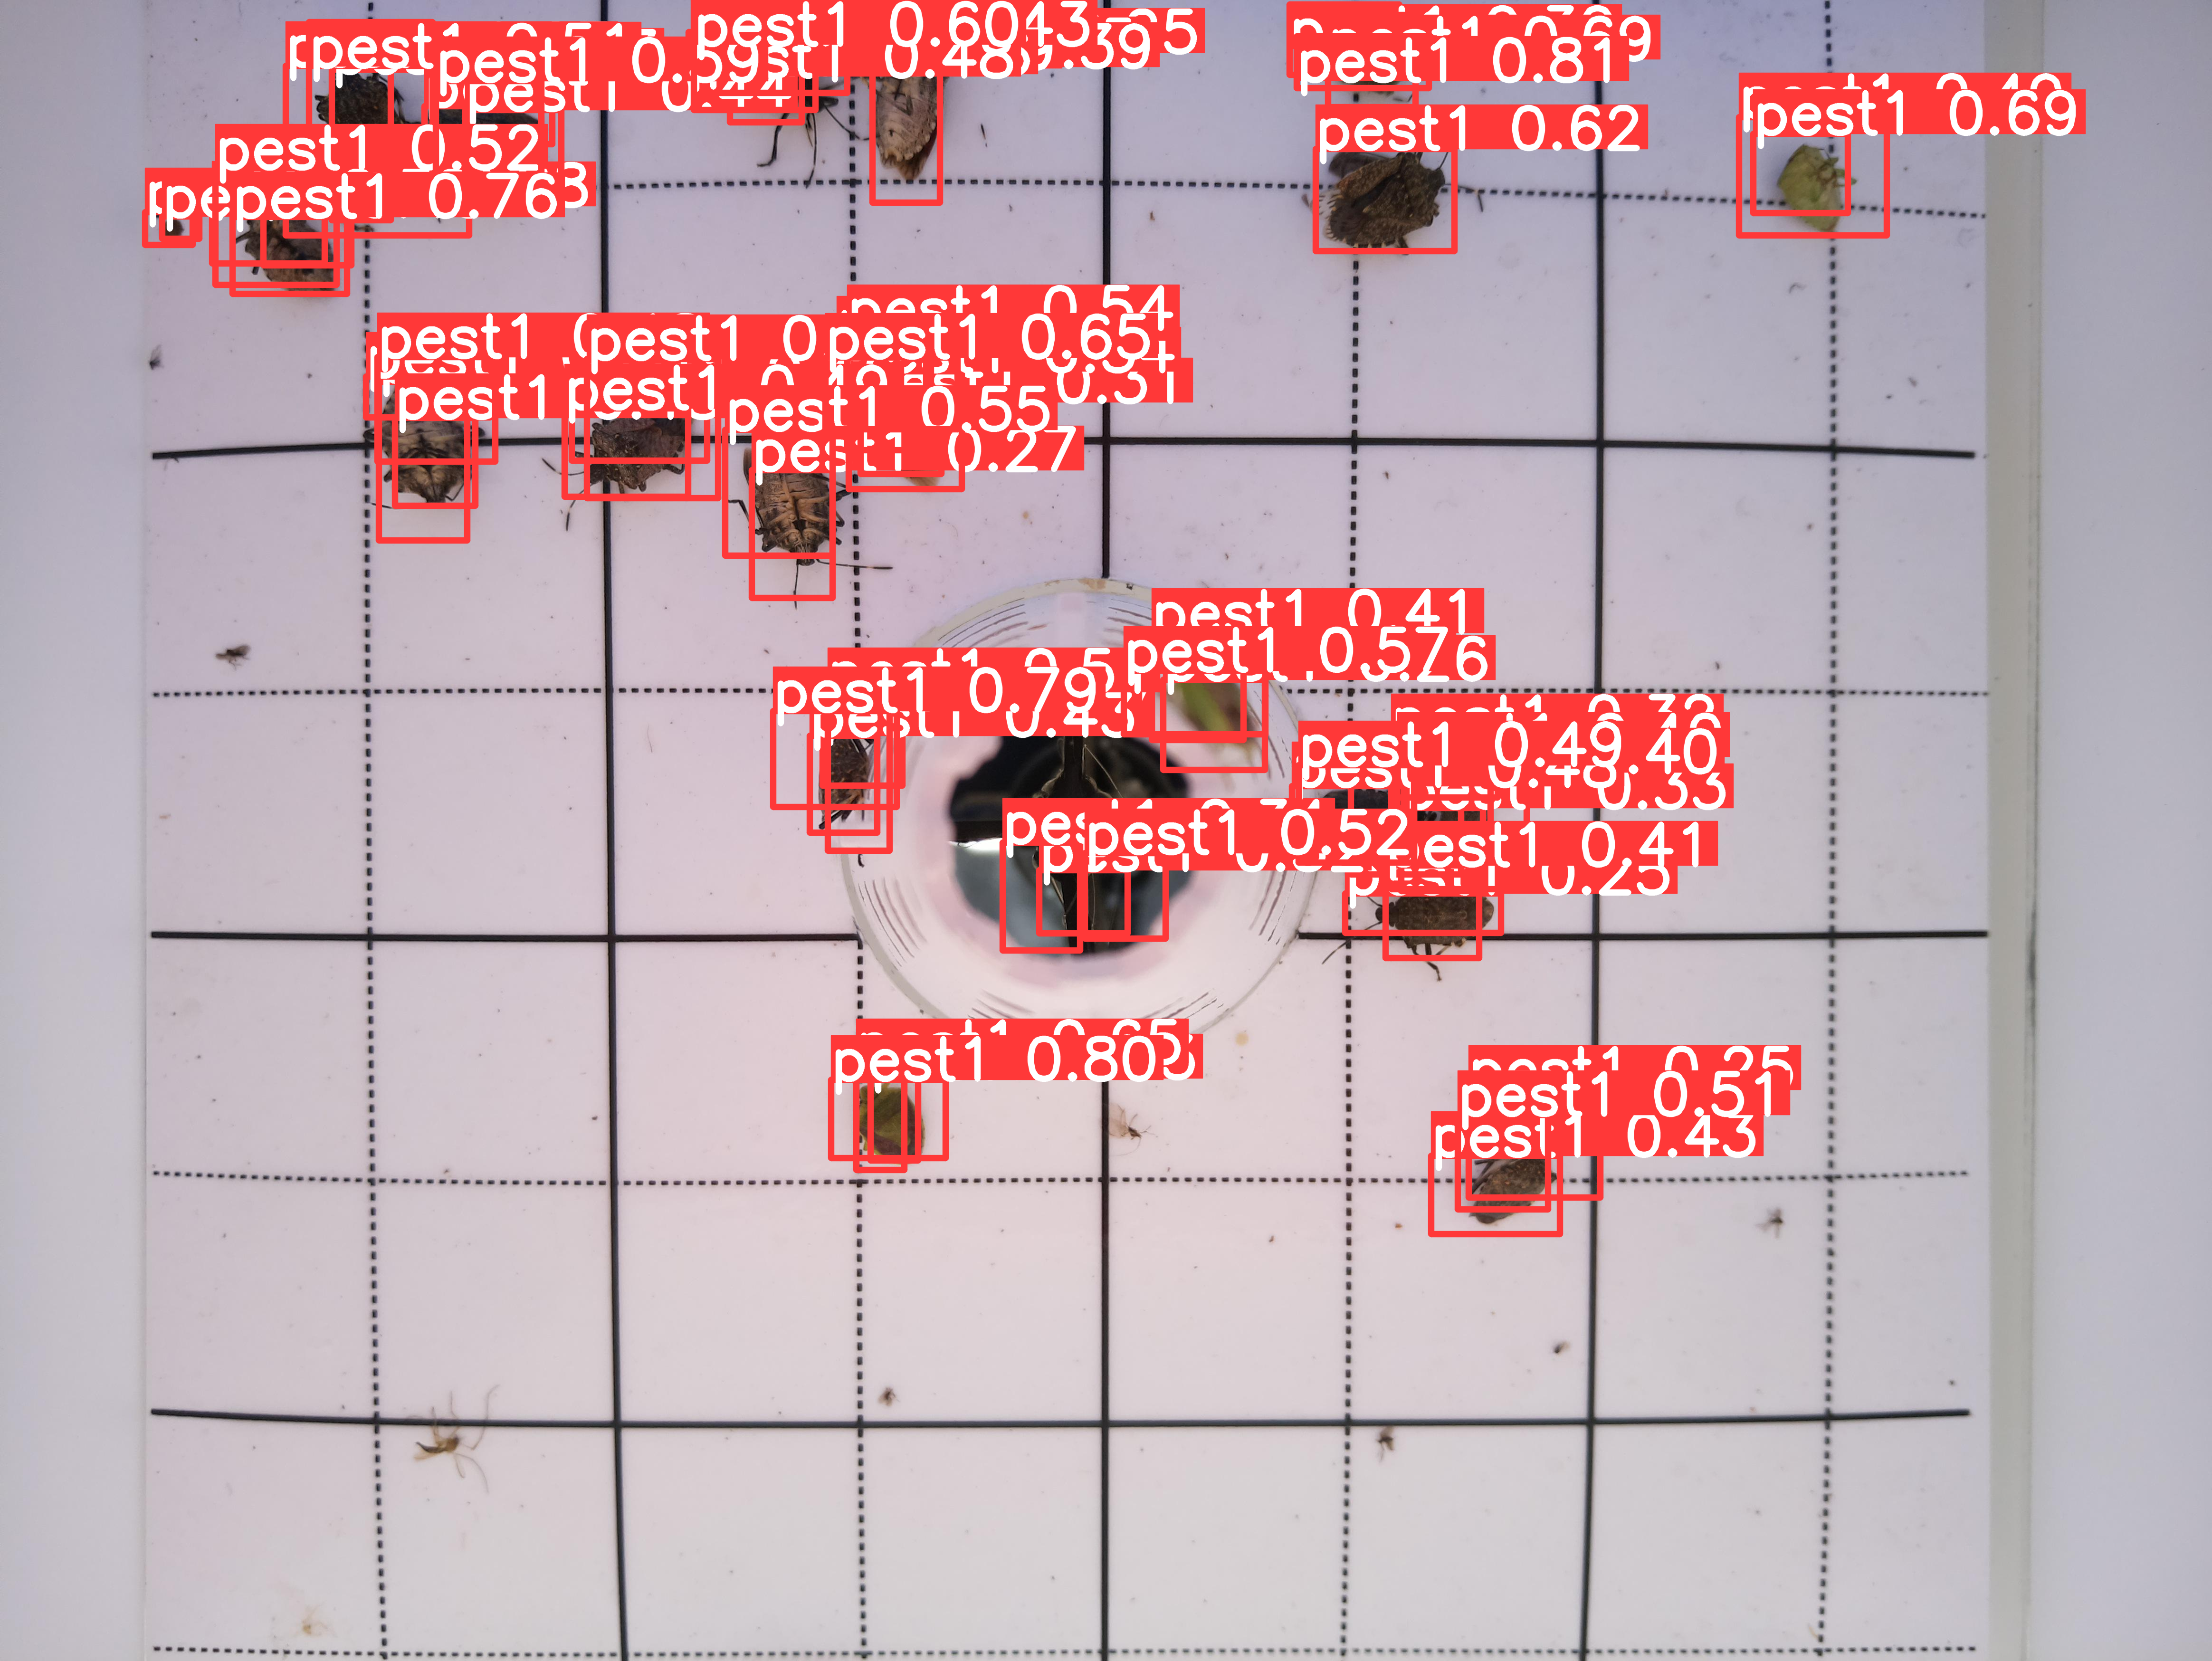

AttributeError: 'Detections' object has no attribute 'imgs'

In [12]:
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
img = "dataset/test/" + "capture_204_446_20231124111957021_ori_jpg.rf.b9207b7feadabff417d25989f1e74a3d.jpg"

# 예측 수행
results = model(img)

# 결과 시각화
results.show()

# 또는 결과를 Matplotlib로 시각화
results.render()  # 인플레이스에서 이미지에 바운딩 박스를 그립니다.
plt.imshow(cv2.cvtColor(results.imgs[0], cv2.COLOR_BGR2RGB))
plt.show()